<a href="https://colab.research.google.com/github/olcaykursun/ML/blob/main/grades_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pwd
%cd /content/drive/MyDrive/Colab\ Notebooks/ML/
!pwd
import numpy as np
import pandas as pd

df = pd.read_csv('grades_dataset.csv')
df.head()

/content/drive/MyDrive/Colab Notebooks/ML
/content/drive/MyDrive/Colab Notebooks/ML
/content/drive/MyDrive/Colab Notebooks/ML


,Exams,Assignments,Final_Grade
0,77.440675,87.112661,88.26
1,85.759468,70.800319,88.61
2,80.138169,89.407761,88.33
3,77.244159,98.487542,88.83
4,71.182740,69.950126,78.82


In [ ]:
df.columns

Index(['Exams', 'Assignments', 'Final_Grade'], dtype='object')

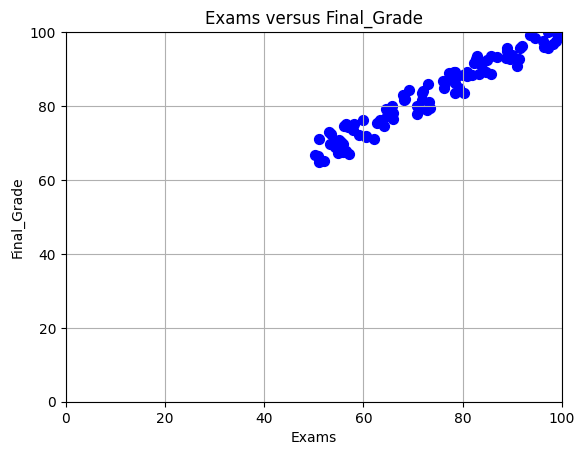

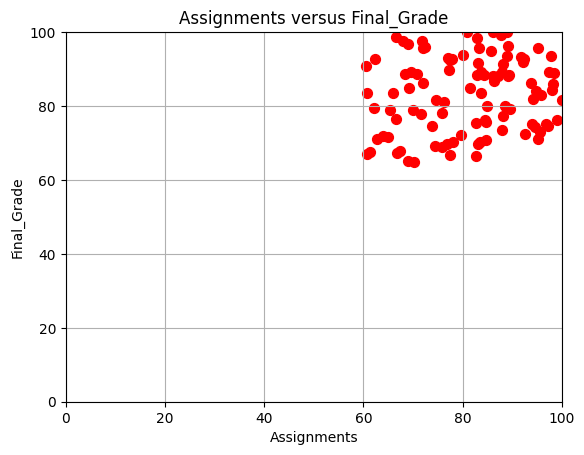

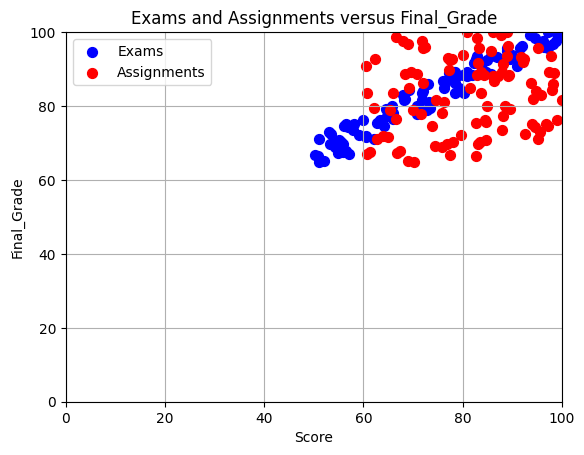

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

plt.scatter(df['Exams'], df['Final_Grade'], s=50, c='blue')
plt.title('Exams versus Final_Grade')
plt.xlabel('Exams')
plt.ylabel('Final_Grade')
plt.grid(True)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

plt.scatter(df['Assignments'], df['Final_Grade'], s=50, c='red')
plt.title('Assignments versus Final_Grade')
plt.xlabel('Assignments')
plt.ylabel('Final_Grade')
plt.grid(True)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

plt.scatter(df['Exams'], df['Final_Grade'], s=50, c='blue', label='Exams')
plt.scatter(df['Assignments'], df['Final_Grade'], s=50, c='red', label='Assignments')
plt.title('Exams and Assignments versus Final_Grade')
plt.xlabel('Score')
plt.ylabel('Final_Grade')
plt.grid(True)
plt.legend()
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[67.85067409]
67.85067408949507
[ 67.85067409  67.85067409  67.85067409 104.78990256]
[ 67.85067409  67.85067409  67.85067409 104.78990256]


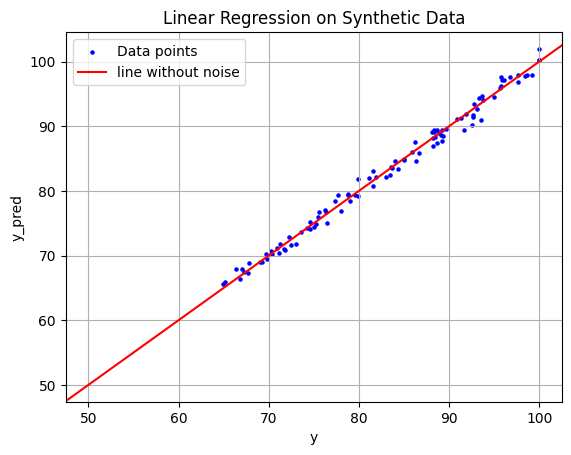

Mean Squared Error: 0.86


In [ ]:
# Linear Regression
X = df.drop(columns='Final_Grade')
y = df['Final_Grade']

reg = LinearRegression()
reg.fit(X, y)
print(reg.predict([[60,50]]))
print(reg.predict([[60,50],[100,100]])[0])
print(reg.predict(df.from_dict({'Exams':[60, 100], 'Assignments':[50, 100]}))[[0,0,0,1]])

preds = reg.predict(df.from_dict({'Exams':[60, 100], 'Assignments':[50, 100]}))
print(preds[[0,0,0,1]])

# Plot the expected/true vs predicted/actual outputs
y_pred = reg.predict(X)  #y_hat
plt.scatter(y, y_pred, s=5, c='blue', label='Data points')
plt.axline([50, 50], [100, 100], c='red', label='line without noise')
plt.title('Linear Regression on Synthetic Data')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.grid(True)
plt.legend()
plt.show()

# Calculate MSE
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


In [ ]:
np.max(y_pred)

101.95375932760126

In [ ]:
reg.coef_

array([0.68407654, 0.19152334])

In [ ]:
reg.intercept_

17.22991486702452

In [ ]:
'''
In a multiple linear regression model, each coefficient
represents the average change in the target variable (y)
for a one-unit change in a corresponding feature,
while keeping all other features constant.
These coefficients act like slopes in a multi-dimensional space.
The intercept, then, serves as a 'baseline' for predictions.
You can think of it as the expected value of the target variable
when all features are at their average values.

By calculating the weighted sum of these averages using the slopes
(coefficients), and then comparing it to the overall average of
the target variable, we can determine this baseline intercept."
'''
Xmeans = X.mean(axis = 0)
weighted_sum_of_Xmeans = np.dot(Xmeans,reg.coef_)
ymean = y.mean()
intercept_estimate = ymean - weighted_sum_of_Xmeans
print(intercept_estimate)

17.22991486702452


In [ ]:
Xmeans

Exams          73.639692
Assignments    81.123270
dtype: float64

In [ ]:
ymean - (Xmeans.values[0]*reg.coef_[0] + Xmeans.values[1]*reg.coef_[1])

17.22991486702452